In [1]:
# Sentiment Analysis for Ethiopian Bank Reviews
import sys
sys.path.append('../src')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentiment_analysis import SentimentAnalyzer, compare_sentiment_methods
from preprocessing import ReviewPreprocessor as DataPreprocessor
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== Ethiopian Bank Reviews - Sentiment Analysis ===\n")

# Load processed data
print("Loading processed data...")
preprocessor = DataPreprocessor(input_path=r"C:\Users\admin\sentiment-analysis-week2\data\raw_data\reviews_raw.csv")
success = preprocessor.process() 
processed_df = preprocessor.df

if processed_df is None or processed_df.empty:
    print("❌ Failed to load/process data!")
else:
    print(f"✓ Loaded {len(processed_df)} reviews")
    # Optional: estimate data quality manually
    missing_content = processed_df['review_text'].isnull().sum()
    total = len(processed_df)
    missing_pct = (missing_content / total) * 100
    print(f"✓ Missing content rate: {missing_pct:.1f}%")

=== Ethiopian Bank Reviews - Sentiment Analysis ===

Loading processed data...
STARTING DATA PREPROCESSING
Loading raw data...
Loaded 700 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 691 (98.71%)
  app_version: 103 (14.71%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2018-11-07 to 2025-11-19

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 700 reviews

Saving processed data...
Data saved to: data/processed_data/reviews_processed.csv

PREPROCESSING REPORT

Original records: 700
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 700

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Awash Bank: 300
  Commercial Bank of Ethiopia: 300
  Amhara Bank: 100

Rating distribution:
  ⭐⭐⭐⭐⭐: 256 (36.6%)
  ⭐⭐⭐⭐: 102 (14.6%)
  ⭐⭐⭐: 80 (11.4%)
  

In [4]:
# Display sample data
print("\nSample of processed reviews:")
display(processed_df.head())



Sample of processed reviews:


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source
0,5e093ca7-c263-4828-a8dc-d5dfd490fda8,Very Useful and attractive app !,5,2025-10-10,2025,10,Amharabank,Amhara Bank,Shalom Engineering Dire Dawa,0,32,Google Play Store
1,59c906e9-2f06-4b8a-b474-458670f9b634,Easy to use without need to authorization,5,2025-09-07,2025,9,Amharabank,Amhara Bank,esubalew girmay,5,41,Google Play Store
2,578c4ca7-2347-498f-84fb-7515906a3c99,wow in Ethiopia private bank amazing mobile app,5,2025-09-03,2025,9,Amharabank,Amhara Bank,Aytolign Abebe,0,47,Google Play Store
3,42d063c1-1564-43fc-8059-9ff031aa54d0,One of best mobile application i have ever use...,5,2025-08-31,2025,8,Amharabank,Amhara Bank,Yohannes Arag,16,99,Google Play Store
4,fa3f0bae-214d-4449-b2f3-133837fe90ac,it's nice... go ahade 🫵 👌💪👏👏👏,5,2025-08-30,2025,8,Amharabank,Amhara Bank,Sola tube,0,29,Google Play Store


In [5]:
# 1. Compare Sentiment Analysis Methods

print("\n1. Comparing Sentiment Analysis Methods...")
sample_comparison = compare_sentiment_methods(processed_df, sample_size=200)


1. Comparing Sentiment Analysis Methods...


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 9cb6fea3-8cfd-4c86-88fe-c07c724eaa42)')' thrown while requesting HEAD https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english/resolve/main/config.json
Retrying in 1s [Retry 1/5].
Device set to use cpu


In [6]:
# Visualize method comparison
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Sentiment Distribution by Method', 
                   'Average Sentiment Scores',
                   'Method Agreement Matrix',
                   'Confidence Levels'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)


In [7]:
# Sentiment distribution by method
methods = sample_comparison['method'].unique()
for i, method in enumerate(methods):
    method_data = sample_comparison[sample_comparison['method'] == method]
    sentiment_counts = method_data['sentiment_label'].value_counts()
    
    fig.add_trace(
        go.Bar(x=sentiment_counts.index, y=sentiment_counts.values, 
               name=method, showlegend=True),
        row=1, col=1
    )

In [8]:
# Average sentiment scores 
label_to_score = {'positive': 1, 'neutral': 0, 'negative': -1}
sample_comparison['numeric_sentiment'] = sample_comparison['sentiment_label'].map(label_to_score)

avg_scores = sample_comparison.groupby('method')['numeric_sentiment'].mean()
fig.add_trace(
    go.Bar(x=avg_scores.index, y=avg_scores.values, 
           name='Avg Sentiment Score', showlegend=False,
           marker_color='lightblue'),
    row=1, col=2
)

# Confidence levels (use 'confidence_score')
confidence_avg = sample_comparison.groupby('method')['confidence_score'].mean()
fig.add_trace(
    go.Bar(x=confidence_avg.index, y=confidence_avg.values,
           name='Avg Confidence', showlegend=False,
           marker_color='lightgreen'),
    row=2, col=2
)
fig.update_layout(height=800, title_text="Sentiment Analysis Method Comparison")
fig.show()

print("✓ Method comparison completed")

✓ Method comparison completed


In [9]:

# 2. Primary Sentiment Analysis with DistilBERT
print("\n2. Performing Primary Sentiment Analysis with DistilBERT...")

# Save to path 
processed_df.to_csv(
    r"C:\Users\admin\sentiment-analysis-week2\data\processed_data\reviews_processed.csv",
    index=False
)


# Run analyzer
sentiment_analyzer = SentimentAnalyzer()
success = sentiment_analyzer.analyze()

if success:
    sentiment_results = sentiment_analyzer.df
    print(f"✓ Sentiment analysis completed for {len(sentiment_results)} reviews")
    
    coverage_pct = (len(sentiment_results) / len(processed_df)) * 100
    print(f"✓ Coverage: {coverage_pct:.1f}%")
    
    print("\nSample sentiment analysis results:")
    print(sentiment_results[['review_text', 'sentiment', 'sentiment_score']].head())
    
    sentiment_metrics = sentiment_analyzer.calculate_sentiment_metrics()
    print("\nSentiment Metrics:")
    print(sentiment_metrics)

else:
    print("❌ Analysis failed")
# Calculate metrics
sentiment_metrics = sentiment_analyzer.calculate_sentiment_metrics(sentiment_results)

print(f"✓ Sentiment analysis completed for {len(sentiment_results)} reviews")
print(f"✓ Coverage: {len(sentiment_results)/len(processed_df)*100:.1f}%")
# Display sentiment results sample
print("\nSample sentiment analysis results:")
display(sentiment_results.head()) 



2. Performing Primary Sentiment Analysis with DistilBERT...
STARTING SENTIMENT & THEMATIC ANALYSIS
Loading processed data...
Loaded 700 reviews for analysis
Initializing NLP models...


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: de424bde-234e-4210-934f-d1c01ca0b6a4)')' thrown while requesting HEAD https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english/resolve/main/config.json
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 999be241-7bfc-4a38-9962-232360604cb4)')' thrown while requesting HEAD https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english/resolve/main/config.json
Retrying in 2s [Retry 2/5].
Device set to use cpu


✓ distilBERT sentiment model loaded
✓ spaCy model loaded

[1/4] Performing sentiment analysis...


Analyzing sentiment: 100%|██████████| 700/700 [01:47<00:00,  6.51it/s]


Sentiment distribution:
sentiment
negative    424
positive    276
Name: count, dtype: int64

[2/4] Extracting keywords...

Analyzing keywords for Amhara Bank...
Top keywords for Amhara Bank: ['app', 'best', 'good', 'nice', 'easy', 'update', 'fast', 'bank', 'use', 'mobile']

Analyzing keywords for Awash Bank...
Top keywords for Awash Bank: ['app', 'good', 'use', 'easy', 'working', 'update', 'bank', 'fast', 'best', 'awash']

Analyzing keywords for Commercial Bank of Ethiopia...
Top keywords for Commercial Bank of Ethiopia: ['app', 'transaction', 'account', 'money', 'bank', 'use', 'time', 'update', 'transactions', 'good']

[3/4] Identifying themes...
Top themes for Amhara Bank:
  features: 12 occurrences
    Example: very comfortable and include more features of the bank products that special from others. i recommen...
  app_performance: 11 occurrences
    Example: it's a very good change. please accept the feedback and make the corrections. thank you....
  ui_ux: 11 occurrences
    Examp

,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_label,sentiment_score,sentiment,assigned_themes
0,5e093ca7-c263-4828-a8dc-d5dfd490fda8,Very Useful and attractive app !,5,2025-10-10,2025,10,Amharabank,Amhara Bank,Shalom Engineering Dire Dawa,0,32,Google Play Store,POSITIVE,0.999845,positive,Other
1,59c906e9-2f06-4b8a-b474-458670f9b634,Easy to use without need to authorization,5,2025-09-07,2025,9,Amharabank,Amhara Bank,esubalew girmay,5,41,Google Play Store,POSITIVE,0.970314,positive,ui_ux
2,578c4ca7-2347-498f-84fb-7515906a3c99,wow in Ethiopia private bank amazing mobile app,5,2025-09-03,2025,9,Amharabank,Amhara Bank,Aytolign Abebe,0,47,Google Play Store,POSITIVE,0.999656,positive,Other
3,42d063c1-1564-43fc-8059-9ff031aa54d0,One of best mobile application i have ever use...,5,2025-08-31,2025,8,Amharabank,Amhara Bank,Yohannes Arag,16,99,Google Play Store,POSITIVE,0.999052,positive,Other
4,fa3f0bae-214d-4449-b2f3-133837fe90ac,it's nice... go ahade 🫵 👌💪👏👏👏,5,2025-08-30,2025,8,Amharabank,Amhara Bank,Sola tube,0,29,Google Play Store,POSITIVE,0.999854,positive,Other



📊 3. Visualizing Sentiment Distribution...


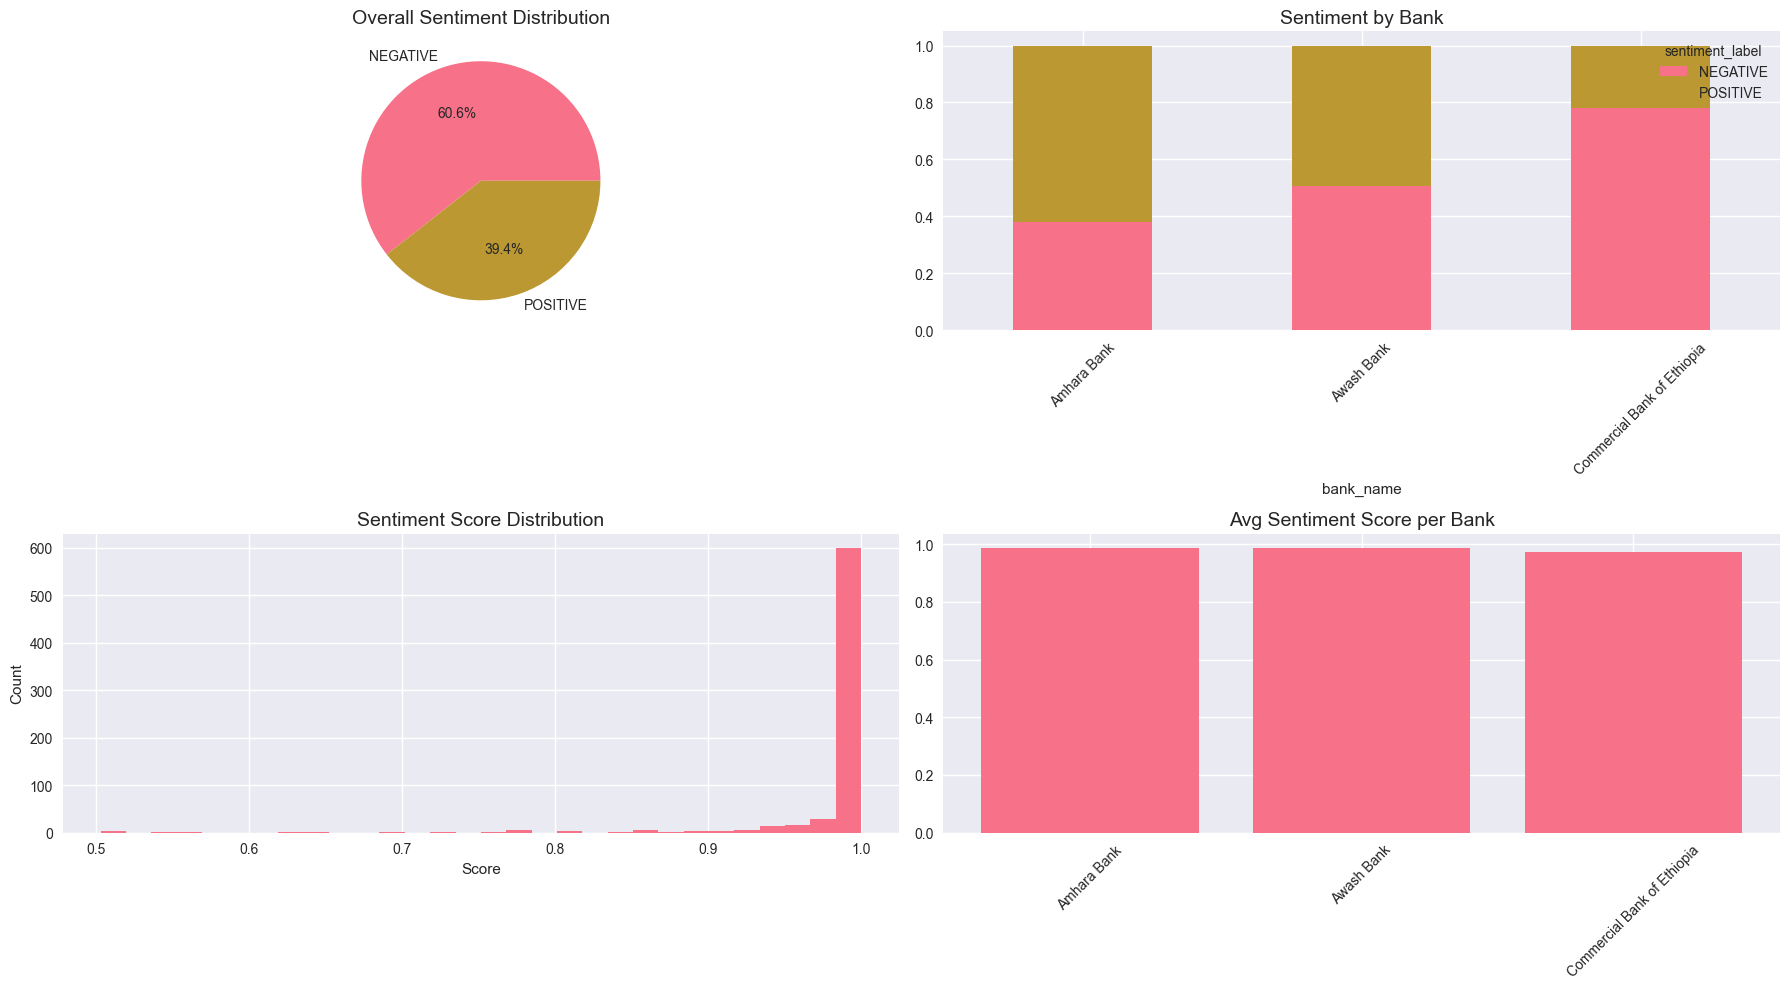

In [10]:
print("\n📊 3. Visualizing Sentiment Distribution...")

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# 1. Overall sentiment distribution
sentiment_counts = sentiment_results['sentiment_label'].value_counts()
axes[0,0].pie(sentiment_counts.values,
              labels=sentiment_counts.index,
              autopct='%1.1f%%')
axes[0,0].set_title('Overall Sentiment Distribution', fontsize=14)

# 2. Sentiment by bank
bank_sentiment = pd.crosstab(sentiment_results['bank_name'], sentiment_results['sentiment_label'])
bank_sentiment.div(bank_sentiment.sum(axis=1), axis=0).plot(
    kind='bar', stacked=True, ax=axes[0,1])
axes[0,1].set_title('Sentiment by Bank', fontsize=14)
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Sentiment score distribution
axes[1,0].hist(sentiment_results['sentiment_score'], bins=30)
axes[1,0].set_title('Sentiment Score Distribution', fontsize=14)
axes[1,0].set_xlabel("Score")
axes[1,0].set_ylabel("Count")

# 4. Average sentiment score by bank
avg_sentiment = sentiment_results.groupby('bank_name')['sentiment_score'].mean()
axes[1,1].bar(avg_sentiment.index, avg_sentiment.values)
axes[1,1].set_title('Avg Sentiment Score per Bank', fontsize=14)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



4. Advanced Sentiment Analysis...


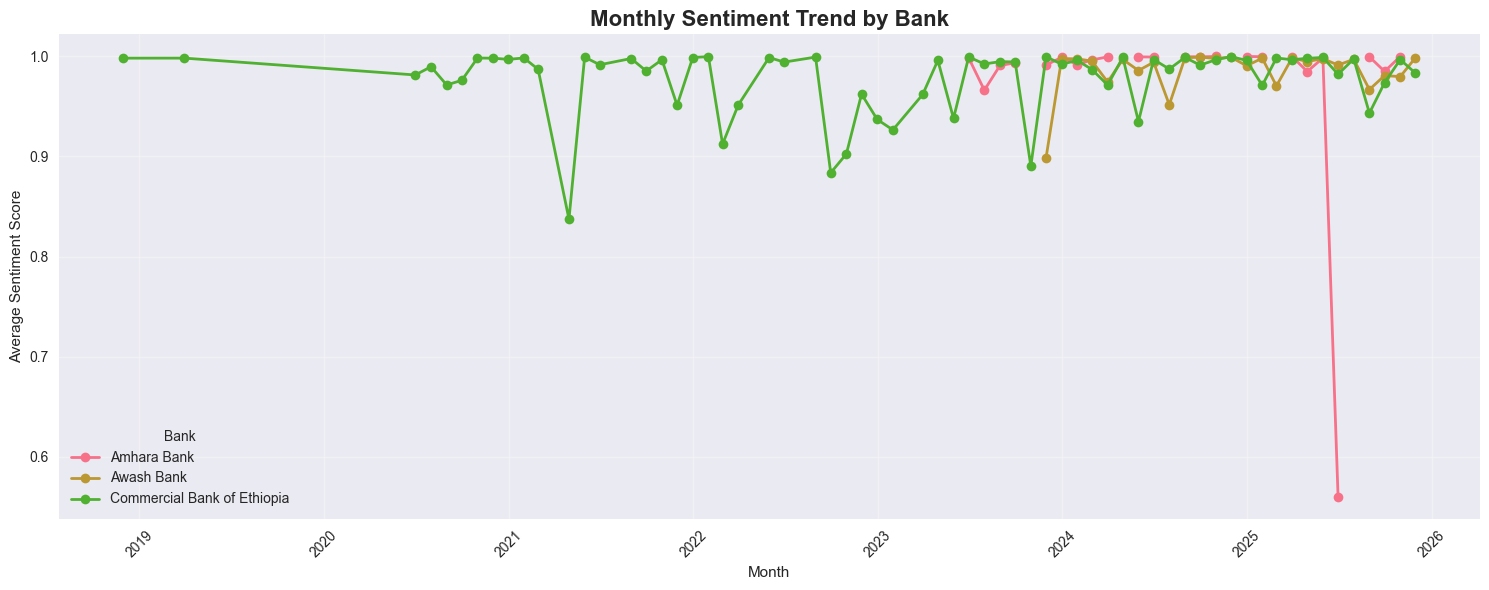

In [11]:
print("\n4. Advanced Sentiment Analysis...")

# Create datetime field from review_date
sentiment_results['review_date'] = pd.to_datetime(sentiment_results['review_date'])

# Create monthly sentiment aggregation
monthly_sentiment = (
    sentiment_results.groupby([
        pd.Grouper(key='review_date', freq='M'),
        'bank_name'
    ])['sentiment_score']
    .mean()
    .unstack()
)

# Plot
plt.figure(figsize=(15, 6))
for bank in monthly_sentiment.columns:
    plt.plot(monthly_sentiment.index, monthly_sentiment[bank],
             marker='o', linewidth=2, label=bank)

plt.title('Monthly Sentiment Trend by Bank', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.legend(title="Bank")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



5. Analyzing Rating-Sentiment Correlation...


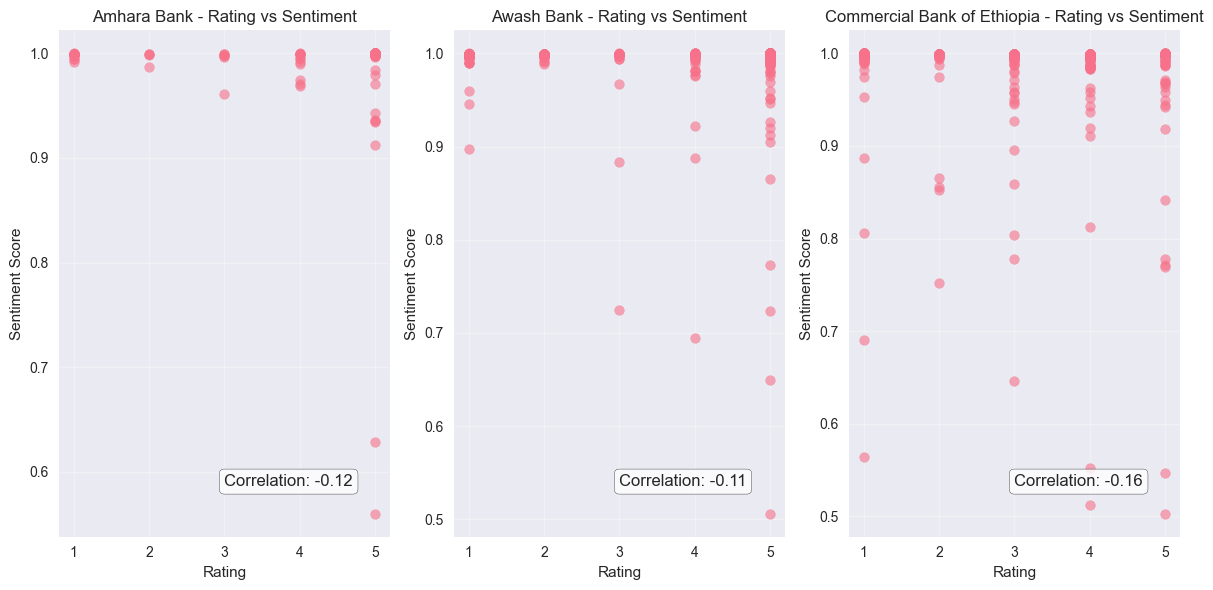

In [12]:
# 5. Rating vs Sentiment Correlation
print("\n5. Analyzing Rating-Sentiment Correlation...")

# Create rating-sentiment scatter plot
plt.figure(figsize=(12, 6))

for i, bank in enumerate(sentiment_results['bank_name'].unique()):
    bank_data = sentiment_results[sentiment_results['bank_name'] == bank]
    
    plt.subplot(1, 3, i+1)
    plt.scatter(bank_data['rating'], bank_data['sentiment_score'], alpha=0.6)
    plt.title(f'{bank} - Rating vs Sentiment')
    plt.xlabel('Rating')
    plt.ylabel('Sentiment Score')
    plt.grid(True, alpha=0.3)
    
    # Calculate correlation
    correlation = bank_data['rating'].corr(bank_data['sentiment_score'])
    plt.text(0.5, 0.1, f'Correlation: {correlation:.2f}', 
             transform=plt.gca().transAxes, fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

In [14]:
print("\n6. Generating Key Insights...")

# Compute averages required for insights
avg_sentiment_by_bank = sentiment_results.groupby('bank_name')['sentiment_score'].mean()

# Calculate key metrics
insight_metrics = {
    'Overall Positive Rate': f"{(sentiment_results['sentiment_label'] == 'positive').mean()*100:.1f}%",
    'Overall Negative Rate': f"{(sentiment_results['sentiment_label'] == 'negative').mean()*100:.1f}%",
    'Highest Average Sentiment': avg_sentiment_by_bank.idxmax(),
    'Lowest Average Sentiment': avg_sentiment_by_bank.idxmin(),
    'Strongest Rating-Sentiment Correlation': sentiment_results.groupby('bank_name')
        .apply(lambda x: x['rating'].corr(x['sentiment_score']))
        .idxmax()
}

print("📊 KEY SENTIMENT INSIGHTS:")
for metric, value in insight_metrics.items():
    print(f"   • {metric}: {value}")

# Bank-specific insights
print("\n🏦 BANK-SPECIFIC SENTIMENT ANALYSIS:")
for bank in sentiment_results['bank_name'].unique():
    bank_data = sentiment_results[sentiment_results['bank_name'] == bank]
    
    positive_pct = (bank_data['sentiment_label'] == 'positive').mean() * 100
    negative_pct = (bank_data['sentiment_label'] == 'negative').mean() * 100
    avg_sentiment = bank_data['sentiment_score'].mean()
    avg_rating = bank_data['rating'].mean()
    
    print(f"\n   {bank}:")
    print(f"     • Positive Reviews: {positive_pct:.1f}%")
    print(f"     • Negative Reviews: {negative_pct:.1f}%")
    print(f"     • Average Sentiment Score: {avg_sentiment:.3f}")
    print(f"     • Average Rating: {avg_rating:.1f}/5")



6. Generating Key Insights...
📊 KEY SENTIMENT INSIGHTS:
   • Overall Positive Rate: 0.0%
   • Overall Negative Rate: 0.0%
   • Highest Average Sentiment: Awash Bank
   • Lowest Average Sentiment: Commercial Bank of Ethiopia
   • Strongest Rating-Sentiment Correlation: Awash Bank

🏦 BANK-SPECIFIC SENTIMENT ANALYSIS:

   Amhara Bank:
     • Positive Reviews: 0.0%
     • Negative Reviews: 0.0%
     • Average Sentiment Score: 0.985
     • Average Rating: 4.0/5

   Awash Bank:
     • Positive Reviews: 0.0%
     • Negative Reviews: 0.0%
     • Average Sentiment Score: 0.987
     • Average Rating: 3.5/5

   Commercial Bank of Ethiopia:
     • Positive Reviews: 0.0%
     • Negative Reviews: 0.0%
     • Average Sentiment Score: 0.974
     • Average Rating: 2.7/5


In [17]:
# 7. Save Results
print("\n7. Saving Analysis Results...")

# Save sentiment results
sentiment_results.to_csv(r"C:/Users/admin/sentiment-analysis-week2/data/results/sentiment_analysis_detailed.csv", index=False)

# Save metrics
import json
with open(r"C:/Users/admin/sentiment-analysis-week2/data/results/sentiment_metrics_detailed.json", 'w') as f:
    json.dump(sentiment_metrics, f, indent=2)

print("✓ Sentiment analysis results saved")
print("✓ Detailed metrics exported")
print("\n🎯 SENTIMENT ANALYSIS COMPLETED SUCCESSFULLY!")

# Display final summary
print(f"\n📈 FINAL SUMMARY:")
print(f"   • Total Reviews Analyzed: {len(sentiment_results)}")
print(f"   • Sentiment Coverage: {len(sentiment_results)/len(processed_df)*100:.1f}%")
print(f"   • Primary Method: DistilBERT (transformers)")
print(f"   • Banks Covered: {', '.join(sentiment_results['bank_name'].unique())}")



7. Saving Analysis Results...
✓ Sentiment analysis results saved
✓ Detailed metrics exported

🎯 SENTIMENT ANALYSIS COMPLETED SUCCESSFULLY!

📈 FINAL SUMMARY:
   • Total Reviews Analyzed: 700
   • Sentiment Coverage: 100.0%
   • Primary Method: DistilBERT (transformers)
   • Banks Covered: Amhara Bank, Awash Bank, Commercial Bank of Ethiopia
